In [26]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [60]:
#df = pd.read_csv("data/1.32.csv")

df100 = pd.read_csv("data/1.0.csv")
df131 = pd.read_csv("data/1.31.csv")
#df132 = pd.read_csv("data/1.32.csv")
df132 = pd.read_csv("data/2016-01-26-hc-1.32.csv")
dftest = pd.read_csv("data/2016-01-26-hc-test.csv")

relevantColumns = ['id', 'serverTime', 'playerId']

part100 = df100.loc[:,relevantColumns]
part131 = df131.loc[:,relevantColumns]
part132 = df132.loc[:,relevantColumns]
parttest = dftest.loc[:,relevantColumns]

df = pd.concat([part100, part131, part132, parttest])


In [61]:
df.head()

,id,serverTime,playerId
0,ec294932-22e7-4e32-8074-54ba6755f2d2,2015-04-17T20:52:31.974Z,b5ab445a-56c9-4c5b-a6d0-86e8a286cd81
1,fdcd8995-ea75-465d-bf97-58c2e0f1df0d,2015-04-17T23:04:30.701Z,b5ab445a-56c9-4c5b-a6d0-86e8a286cd81
2,c382b93e-b11c-424e-9bab-67803d47f352,2015-04-17T23:21:24.426Z,b5ab445a-56c9-4c5b-a6d0-86e8a286cd81
3,4e99e89d-1285-4215-8f53-088ddc5d5bf3,2015-04-18T00:22:20.163Z,b5ab445a-56c9-4c5b-a6d0-86e8a286cd81
4,45837197-12f2-40e1-81e8-2534cac88621,2015-04-18T00:32:11.358Z,b5ab445a-56c9-4c5b-a6d0-86e8a286cd81


In [62]:
durations = df.groupby("playerId").agg({ "serverTime": [ np.min, np.max  ] })

durations.head()

serverTime  \
                                                          amin   
playerId                                                         
00717e1e-67eb-4350-b03d-01dc157299b8  2015-12-16T14:39:39.941Z   
00a654be-6850-424a-a712-7193a2a4af87  2015-05-25T19:48:52.796Z   
00bd9fde-4cae-4e3e-ab3f-6aabeab58f62  2015-10-21T10:44:06.633Z   
00c6213a-7a0e-4890-94b4-ac614e513668  2015-10-27T16:29:44.960Z   
0120d461-24ff-4660-b4dd-995379c69822  2015-07-14T18:05:17.445Z   

                                                                
                                                          amax  
playerId                                                        
00717e1e-67eb-4350-b03d-01dc157299b8  2015-12-16T14:56:01.158Z  
00a654be-6850-424a-a712-7193a2a4af87  2015-05-25T19:55:50.825Z  
00bd9fde-4cae-4e3e-ab3f-6aabeab58f62  2015-10-21T10:50:11.614Z  
00c6213a-7a0e-4890-94b4-ac614e513668  2015-10-27T16:32:50.021Z  
0120d461-24ff-4660-b4dd-995379c69822  2015-07-14T18:05:37.445Z

In [63]:
durations["duration"] = pd.to_datetime(durations["serverTime"]["amax"]) - pd.to_datetime(durations["serverTime"]["amin"])

durations.head()

serverTime  \
                                                          amin   
playerId                                                         
00717e1e-67eb-4350-b03d-01dc157299b8  2015-12-16T14:39:39.941Z   
00a654be-6850-424a-a712-7193a2a4af87  2015-05-25T19:48:52.796Z   
00bd9fde-4cae-4e3e-ab3f-6aabeab58f62  2015-10-21T10:44:06.633Z   
00c6213a-7a0e-4890-94b4-ac614e513668  2015-10-27T16:29:44.960Z   
0120d461-24ff-4660-b4dd-995379c69822  2015-07-14T18:05:17.445Z   

                                                                      duration  
                                                          amax                  
playerId                                                                        
00717e1e-67eb-4350-b03d-01dc157299b8  2015-12-16T14:56:01.158Z 00:16:21.217000  
00a654be-6850-424a-a712-7193a2a4af87  2015-05-25T19:55:50.825Z 00:06:58.029000  
00bd9fde-4cae-4e3e-ab3f-6aabeab58f62  2015-10-21T10:50:11.614Z 00:06:04.981000  
00c6213a-7a0e-4890-94b4-ac614e513668  2015-10-27T16:32:50.021Z 00:03:05.061000  
0120d461-24ff-4660-b4dd-995379c69822  2015-07-14T18:05:37.445Z        00:00:20

In [64]:
durations["duration"] = durations["duration"].map(lambda x: np.timedelta64(x, 's'))

durations.head()

serverTime  \
                                                          amin   
playerId                                                         
00717e1e-67eb-4350-b03d-01dc157299b8  2015-12-16T14:39:39.941Z   
00a654be-6850-424a-a712-7193a2a4af87  2015-05-25T19:48:52.796Z   
00bd9fde-4cae-4e3e-ab3f-6aabeab58f62  2015-10-21T10:44:06.633Z   
00c6213a-7a0e-4890-94b4-ac614e513668  2015-10-27T16:29:44.960Z   
0120d461-24ff-4660-b4dd-995379c69822  2015-07-14T18:05:17.445Z   

                                                               duration  
                                                          amax           
playerId                                                                 
00717e1e-67eb-4350-b03d-01dc157299b8  2015-12-16T14:56:01.158Z 00:16:21  
00a654be-6850-424a-a712-7193a2a4af87  2015-05-25T19:55:50.825Z 00:06:58  
00bd9fde-4cae-4e3e-ab3f-6aabeab58f62  2015-10-21T10:50:11.614Z 00:06:04  
00c6213a-7a0e-4890-94b4-ac614e513668  2015-10-27T16:32:50.021Z 00:03:05  
0120d461-24ff-4660-b4dd-995379c69822  2015-07-14T18:05:37.445Z 00:00:20

In [65]:
durations = durations.sort_values(by=['duration'], ascending=[False])

durations.head()

serverTime  \
                                                          amin   
playerId                                                         
b5ab445a-56c9-4c5b-a6d0-86e8a286cd81  2015-04-17T20:52:31.974Z   
c38e4138-0c29-4b62-b516-8ee3b1dda3f3  2015-08-07T13:08:12.370Z   
4f8e87f8-3f07-43fc-ad9d-e56a8d1e739a  2015-07-08T19:06:12.475Z   
9187eb52-cc51-4ca3-8fcd-8db840fac023  2015-05-05T08:00:27.687Z   
95bd33a2-fb3c-4b03-9688-e1f00343a537  2015-12-23T19:34:25.120Z   

                                                                \
                                                          amax   
playerId                                                         
b5ab445a-56c9-4c5b-a6d0-86e8a286cd81  2015-09-21T10:07:46.121Z   
c38e4138-0c29-4b62-b516-8ee3b1dda3f3  2015-08-11T08:39:24.458Z   
4f8e87f8-3f07-43fc-ad9d-e56a8d1e739a  2015-07-09T16:02:43.481Z   
9187eb52-cc51-4ca3-8fcd-8db840fac023  2015-05-05T17:19:55.720Z   
95bd33a2-fb3c-4b03-9688-e1f00343a537  2015-12-23T21:31:46.090Z   

                                              duration  
                                                        
playerId                                                
b5ab445a-56c9-4c5b-a6d0-86e8a286cd81 156 days 13:15:14  
c38e4138-0c29-4b62-b516-8ee3b1dda3f3   3 days 19:31:12  
4f8e87f8-3f07-43fc-ad9d-e56a8d1e739a   0 days 20:56:31  
9187eb52-cc51-4ca3-8fcd-8db840fac023   0 days 09:19:28  
95bd33a2-fb3c-4b03-9688-e1f00343a537   0 days 01:57:20

In [66]:
timedelta = pd.to_datetime("2015-10-21T10:50:11.614Z") - pd.to_datetime("2015-10-21T10:44:06.633Z")

print timedelta

0 days 00:06:04.981000


In [67]:
durations.loc[:,'duration']
durations.head()

serverTime  \
                                                          amin   
playerId                                                         
b5ab445a-56c9-4c5b-a6d0-86e8a286cd81  2015-04-17T20:52:31.974Z   
c38e4138-0c29-4b62-b516-8ee3b1dda3f3  2015-08-07T13:08:12.370Z   
4f8e87f8-3f07-43fc-ad9d-e56a8d1e739a  2015-07-08T19:06:12.475Z   
9187eb52-cc51-4ca3-8fcd-8db840fac023  2015-05-05T08:00:27.687Z   
95bd33a2-fb3c-4b03-9688-e1f00343a537  2015-12-23T19:34:25.120Z   

                                                                \
                                                          amax   
playerId                                                         
b5ab445a-56c9-4c5b-a6d0-86e8a286cd81  2015-09-21T10:07:46.121Z   
c38e4138-0c29-4b62-b516-8ee3b1dda3f3  2015-08-11T08:39:24.458Z   
4f8e87f8-3f07-43fc-ad9d-e56a8d1e739a  2015-07-09T16:02:43.481Z   
9187eb52-cc51-4ca3-8fcd-8db840fac023  2015-05-05T17:19:55.720Z   
95bd33a2-fb3c-4b03-9688-e1f00343a537  2015-12-23T21:31:46.090Z   

                                              duration  
                                                        
playerId                                                
b5ab445a-56c9-4c5b-a6d0-86e8a286cd81 156 days 13:15:14  
c38e4138-0c29-4b62-b516-8ee3b1dda3f3   3 days 19:31:12  
4f8e87f8-3f07-43fc-ad9d-e56a8d1e739a   0 days 20:56:31  
9187eb52-cc51-4ca3-8fcd-8db840fac023   0 days 09:19:28  
95bd33a2-fb3c-4b03-9688-e1f00343a537   0 days 01:57:20

In [68]:
durations = durations[4:]
durations.head()

serverTime  \
                                                          amin   
playerId                                                         
95bd33a2-fb3c-4b03-9688-e1f00343a537  2015-12-23T19:34:25.120Z   
407d8ae6-5697-4438-bc4d-c35d20888ce8  2016-01-21T11:49:54.979Z   
9e01584b-2ab5-407e-a9e0-b3a816b9ffa3  2015-06-16T15:09:04.316Z   
d1530309-0c5c-4657-917f-9854a09a1ce8  2015-07-07T16:15:57.888Z   
3ae33faa-e248-44d7-bd0a-5f1493f152c9  2015-10-06T12:28:17.889Z   

                                                               duration  
                                                          amax           
playerId                                                                 
95bd33a2-fb3c-4b03-9688-e1f00343a537  2015-12-23T21:31:46.090Z 01:57:20  
407d8ae6-5697-4438-bc4d-c35d20888ce8  2016-01-21T13:32:20.630Z 01:42:25  
9e01584b-2ab5-407e-a9e0-b3a816b9ffa3  2015-06-16T16:41:24.221Z 01:32:19  
d1530309-0c5c-4657-917f-9854a09a1ce8  2015-07-07T17:43:55.977Z 01:27:58  
3ae33faa-e248-44d7-bd0a-5f1493f152c9  2015-10-06T13:50:08.394Z 01:21:50

In [69]:
durations["duration_seconds"] = durations["duration"].map(lambda x: pd.Timedelta(x).seconds)
durations.head()

serverTime  \
                                                          amin   
playerId                                                         
95bd33a2-fb3c-4b03-9688-e1f00343a537  2015-12-23T19:34:25.120Z   
407d8ae6-5697-4438-bc4d-c35d20888ce8  2016-01-21T11:49:54.979Z   
9e01584b-2ab5-407e-a9e0-b3a816b9ffa3  2015-06-16T15:09:04.316Z   
d1530309-0c5c-4657-917f-9854a09a1ce8  2015-07-07T16:15:57.888Z   
3ae33faa-e248-44d7-bd0a-5f1493f152c9  2015-10-06T12:28:17.889Z   

                                                               duration  \
                                                          amax            
playerId                                                                  
95bd33a2-fb3c-4b03-9688-e1f00343a537  2015-12-23T21:31:46.090Z 01:57:20   
407d8ae6-5697-4438-bc4d-c35d20888ce8  2016-01-21T13:32:20.630Z 01:42:25   
9e01584b-2ab5-407e-a9e0-b3a816b9ffa3  2015-06-16T16:41:24.221Z 01:32:19   
d1530309-0c5c-4657-917f-9854a09a1ce8  2015-07-07T17:43:55.977Z 01:27:58   
3ae33faa-e248-44d7-bd0a-5f1493f152c9  2015-10-06T13:50:08.394Z 01:21:50   

                                     duration_seconds  
                                                       
playerId                                               
95bd33a2-fb3c-4b03-9688-e1f00343a537             7040  
407d8ae6-5697-4438-bc4d-c35d20888ce8             6145  
9e01584b-2ab5-407e-a9e0-b3a816b9ffa3             5539  
d1530309-0c5c-4657-917f-9854a09a1ce8             5278  
3ae33faa-e248-44d7-bd0a-5f1493f152c9             4910

In [70]:
durations["duration_rank"] = durations["duration_seconds"].rank(ascending=False)
durations.head()

serverTime  \
                                                          amin   
playerId                                                         
95bd33a2-fb3c-4b03-9688-e1f00343a537  2015-12-23T19:34:25.120Z   
407d8ae6-5697-4438-bc4d-c35d20888ce8  2016-01-21T11:49:54.979Z   
9e01584b-2ab5-407e-a9e0-b3a816b9ffa3  2015-06-16T15:09:04.316Z   
d1530309-0c5c-4657-917f-9854a09a1ce8  2015-07-07T16:15:57.888Z   
3ae33faa-e248-44d7-bd0a-5f1493f152c9  2015-10-06T12:28:17.889Z   

                                                               duration  \
                                                          amax            
playerId                                                                  
95bd33a2-fb3c-4b03-9688-e1f00343a537  2015-12-23T21:31:46.090Z 01:57:20   
407d8ae6-5697-4438-bc4d-c35d20888ce8  2016-01-21T13:32:20.630Z 01:42:25   
9e01584b-2ab5-407e-a9e0-b3a816b9ffa3  2015-06-16T16:41:24.221Z 01:32:19   
d1530309-0c5c-4657-917f-9854a09a1ce8  2015-07-07T17:43:55.977Z 01:27:58   
3ae33faa-e248-44d7-bd0a-5f1493f152c9  2015-10-06T13:50:08.394Z 01:21:50   

                                     duration_seconds duration_rank  
                                                                     
playerId                                                             
95bd33a2-fb3c-4b03-9688-e1f00343a537             7040             1  
407d8ae6-5697-4438-bc4d-c35d20888ce8             6145             2  
9e01584b-2ab5-407e-a9e0-b3a816b9ffa3             5539             3  
d1530309-0c5c-4657-917f-9854a09a1ce8             5278             4  
3ae33faa-e248-44d7-bd0a-5f1493f152c9             4910             5

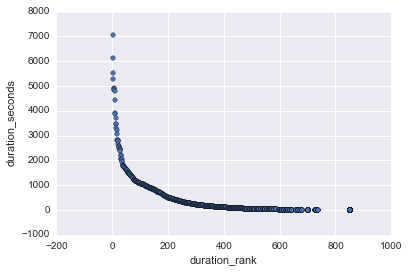

In [71]:
scatteredDurations = durations.sort_values(by=['duration_rank'], ascending=[True])
scatteredDurations.plot(kind='scatter', x="duration_rank", y="duration_seconds")

(0, 6000)

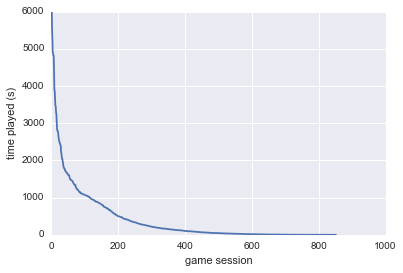

In [72]:
durations.plot(x="duration_rank", y="duration_seconds")
#durations.plot(kind='bar', x="duration_rank", y="duration_seconds")


plt.xlabel("game session")
plt.ylabel("time played (s)")
plt.legend('')
plt.xlim(0, 1000)
plt.ylim(0, 6000)

In [73]:
durations["duration_seconds"].describe()

count     961.000000
mean      365.566077
std       757.275965
min         0.000000
25%         4.000000
50%        50.000000
75%       361.000000
max      7040.000000
Name: duration_seconds, dtype: float64

In [74]:
durations.head()

serverTime  \
                                                          amin   
playerId                                                         
95bd33a2-fb3c-4b03-9688-e1f00343a537  2015-12-23T19:34:25.120Z   
407d8ae6-5697-4438-bc4d-c35d20888ce8  2016-01-21T11:49:54.979Z   
9e01584b-2ab5-407e-a9e0-b3a816b9ffa3  2015-06-16T15:09:04.316Z   
d1530309-0c5c-4657-917f-9854a09a1ce8  2015-07-07T16:15:57.888Z   
3ae33faa-e248-44d7-bd0a-5f1493f152c9  2015-10-06T12:28:17.889Z   

                                                               duration  \
                                                          amax            
playerId                                                                  
95bd33a2-fb3c-4b03-9688-e1f00343a537  2015-12-23T21:31:46.090Z 01:57:20   
407d8ae6-5697-4438-bc4d-c35d20888ce8  2016-01-21T13:32:20.630Z 01:42:25   
9e01584b-2ab5-407e-a9e0-b3a816b9ffa3  2015-06-16T16:41:24.221Z 01:32:19   
d1530309-0c5c-4657-917f-9854a09a1ce8  2015-07-07T17:43:55.977Z 01:27:58   
3ae33faa-e248-44d7-bd0a-5f1493f152c9  2015-10-06T13:50:08.394Z 01:21:50   

                                     duration_seconds duration_rank  
                                                                     
playerId                                                             
95bd33a2-fb3c-4b03-9688-e1f00343a537             7040             1  
407d8ae6-5697-4438-bc4d-c35d20888ce8             6145             2  
9e01584b-2ab5-407e-a9e0-b3a816b9ffa3             5539             3  
d1530309-0c5c-4657-917f-9854a09a1ce8             5278             4  
3ae33faa-e248-44d7-bd0a-5f1493f152c9             4910             5

#game sessions=961


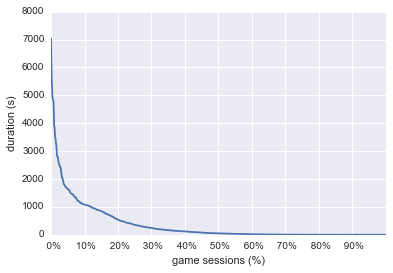

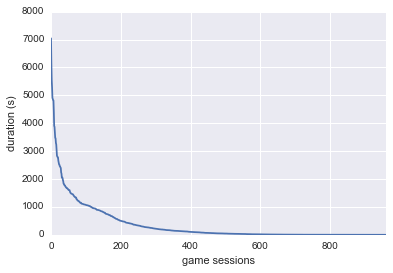

In [75]:
#durationTable = pd.DataFrame({"durations": durations["duration_seconds"].values})
#interestingValues = durations["duration_seconds"][4:32].values
#interestingValues = durations["duration_seconds"].values
#durationTable = pd.DataFrame({"durations": interestingValues})

%run plotUtilities.ipynb

durationTable = pd.DataFrame({"durations": durations["duration_seconds"].values})
durationTableCount = durationTable["durations"].count()
print '#game sessions={0}'.format(durationTableCount)

genericTreatment(durationTable, "game sessions", "duration (s)", durationTableCount)